In [1]:
import pandas as pd
import numpy as np

## Teste de Entrega Delivery

In [17]:
df = pd.read_csv("lanchonete.csv")
df

,Entrega_ID,Minutos,Segundos
0,1,35,57
1,2,31,58
2,3,38,49
3,4,46,14
4,5,30,8
5,6,30,8
6,7,38,41
7,8,35,9
8,9,32,22
9,10,32,22


In [18]:
# Sabemos que, Quanto mais próximo de 0 for o desvio padrão, mais homogêneo são os dados.
df.describe()

,Entrega_ID,Minutos,Segundos
count,30.000000,30.000000,30.000000
mean,15.500000,32.833333,27.266667
std,8.803408,4.828674,20.025731
min,1.000000,24.000000,3.000000
25%,8.250000,30.000000,9.000000
50%,15.500000,32.000000,22.000000
75%,22.750000,35.750000,48.000000
max,30.000000,46.000000,58.000000


## Teste t de Studant

In [15]:
from scipy.stats import t

# t calculado e graus de liberdade
t_value = 1.37
df = 29

# p-valor unilateral (direita)
p_valor = 1 - t.cdf(t_value, df)

print(f"p-valor = {p_valor:.4f}")

p-valor = 0.0906


In [7]:
# Duas amostras independentes

from scipy.stats import ttest_ind

grupo_a = [52, 48, 50, 49, 51]
grupo_b = [45, 47, 44, 46, 43]

# Teste t de Student (bilateral por padrão)
t_stat, p_valor = ttest_ind(grupo_a, grupo_b)

#Se p < 0.05, rejeitamos H0: há diferença significativa entre os grupos.
print(f"t = {t_stat:.3f}")
print(f"p-valor = {p_valor:.3f}")

t = 5.000
p-valor = 0.001


In [8]:
# Teste t pareado (antes e depois)

from scipy.stats import ttest_rel

antes = [60, 65, 62, 64, 63]
depois = [66, 70, 68, 69, 67]

t_stat, p_valor = ttest_rel(antes, depois)

# Se p < 0.05, rejeitamos H0: houve mudança significativa entre antes e depois (diferença entre os pares).
print(f"t = {t_stat:.3f}")
print(f"p-valor = {p_valor:.3f}")

t = -13.898
p-valor = 0.000


In [9]:
# Teste unilateral (H_1: u1 < u2)

from scipy.stats import ttest_ind

a = [52, 48, 50, 49, 51]
b = [45, 47, 44, 46, 43]

t_stat, p_bilateral = ttest_ind(a, b)

# Para unilateral à esquerda (H1: média_a < média_b)
if t_stat < 0:
    p_unilateral = p_bilateral / 2
else:
    p_unilateral = 1 - (p_bilateral / 2)

# Se o p_unilateral < 0.05, rejeitamos H0 : há evidência significativa na direção especificada.
print(f"t = {t_stat:.3f}")
print(f"p-valor unilateral = {p_unilateral:.3f}")

t = 5.000
p-valor unilateral = 0.999


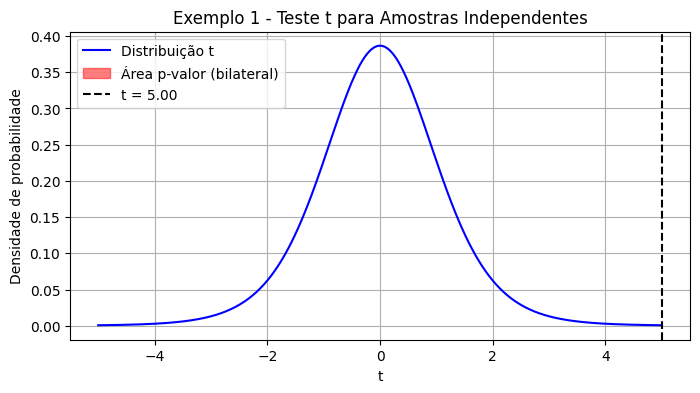

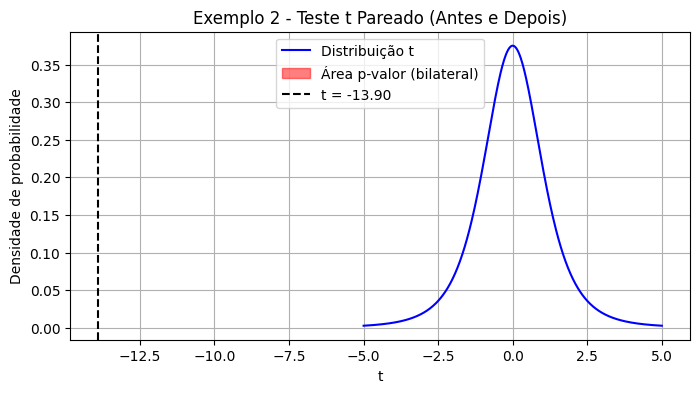

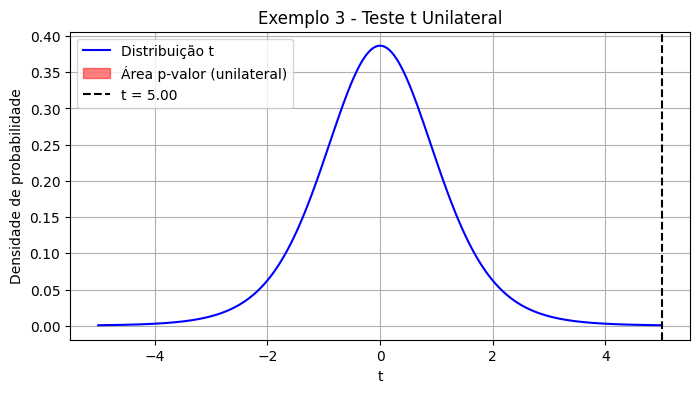

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, ttest_ind, ttest_rel

# Parâmetros dos exemplos
grupo_a = [52, 48, 50, 49, 51]
grupo_b = [45, 47, 44, 46, 43]
antes = [60, 65, 62, 64, 63]
depois = [66, 70, 68, 69, 67]

# Testes t
t_ind, p_ind = ttest_ind(grupo_a, grupo_b)
t_rel, p_rel = ttest_rel(antes, depois)

# Unilateral (esquerda)
t_uni, p_bilat = ttest_ind(grupo_a, grupo_b)
p_uni = p_bilat / 2 if t_uni < 0 else 1 - p_bilat / 2

# Domínio para curva t
df_ind = len(grupo_a) + len(grupo_b) - 2
df_rel = len(antes) - 1
x = np.linspace(-5, 5, 500)
curve_ind = t.pdf(x, df_ind)
curve_rel = t.pdf(x, df_rel)

# Função para plotar
def plot_t_distribution(t_val, df, p_valor, titulo, unilateral=False):
    plt.figure(figsize=(8, 4))
    plt.plot(x, t.pdf(x, df), label='Distribuição t', color='blue')
    plt.title(titulo)
    plt.xlabel('t')
    plt.ylabel('Densidade de probabilidade')
    plt.grid(True)
    
    if unilateral:
        x_fill = x[x <= t_val] if t_val < 0 else x[x >= t_val]
        plt.fill_between(x_fill, t.pdf(x_fill, df), color='red', alpha=0.5, label='Área p-valor (unilateral)')
    else:
        plt.fill_between(x[x <= -abs(t_val)], t.pdf(x[x <= -abs(t_val)], df), color='red', alpha=0.5)
        plt.fill_between(x[x >= abs(t_val)], t.pdf(x[x >= abs(t_val)], df), color='red', alpha=0.5, label='Área p-valor (bilateral)')
    
    plt.axvline(t_val, color='black', linestyle='--', label=f't = {t_val:.2f}')
    plt.legend()

# Gerar os três gráficos
plot_t_distribution(t_ind, df_ind, p_ind, 'Exemplo 1 - Teste t para Amostras Independentes')
plot_t_distribution(t_rel, df_rel, p_rel, 'Exemplo 2 - Teste t Pareado (Antes e Depois)')
plot_t_distribution(t_uni, df_ind, p_uni, 'Exemplo 3 - Teste t Unilateral', unilateral=True)

plt.show()


In [19]:
import scipy.stats as stats

df_tempo_entrega = pd.DataFrame(df)

# Criando nova coluna 'Tempo_entrega'
df_tempo_entrega['Tempo_Entrega'] = df_tempo_entrega['Minutos'] + (df_tempo_entrega['Segundos']/60) 
print(df_tempo_entrega.head())

# Definir a média esperada (H0: média = 30 horas)
media_esperada = 30

# Realizar o teste t para amostras únicas
t_stat, p_val = stats.ttest_1samp(df_tempo_entrega['Tempo_Entrega'], media_esperada)

# Exibir os resultados
print(f"Estatística t: {t_stat}")
print(f"p-valor: {p_val}")

# Interpretação do p-valor
alpha = 0.05
if p_val < alpha:
    print("Rejeitamos a hipótese nula (H₀). A média do valor de tempo para entrega é significativamente diferente de 30 horas.")
else:
   print("Falhamos em rejeitar a hipótese nula (H₀). A média do valor de tempo para a entrega é significativamente diferente de 30 horas.")


   Entrega_ID  Minutos  Segundos  Tempo_Entrega
0           1       35        57      35.950000
1           2       31        58      31.966667
2           3       38        49      38.816667
3           4       46        14      46.233333
4           5       30         8      30.133333
Estatística t: 3.699465245936296
p-valor: 0.0008987546397060579
Rejeitamos a hipótese nula (H₀). A média do valor de tempo para entrega é significativamente diferente de 30 horas.


In [27]:
import scipy.stats as stats
t_stat = 2.078
df = 11

# p-valor unilateral (direita)
p_valor = 1 - t.cdf(t_stat, df)
print(f"p-valor = {p_valor:.4f}")

p-valor = 0.0310
